### Demand generation
Decide whether demand is given or randomly generated

In [50]:
# Option 1 : given demand
demand = [217, 125, 242, 231, 263, 75, 0]
numPeriods = len(demand)

In [2]:
# Option 2 : randomly generated
import random
random.seed('0123456')
maxDemand = 500
numPeriods = 12

demand = [int(maxDemand*random.random()) for t in range(numPeriods)]
print(demand)

[102, 74, 375, 427, 240, 371, 30, 306, 487, 65, 310, 149]


### Parameters

In [51]:
inventory = 400  # initial inventory at simulation start
L = 2

# parameters for policies (R,S), (s,Q), or (s,S)
R = 2  # periodic ordering
S = 750  # order-up-to level
s = 320  # reorder point
Q = 550  # lot size

### Calculation

In [52]:
import pandas as pd
import copy

policies = {
    "s,Q": None, 
    "R,S": None, 
    "s,S": None
}

for policy in policies.keys():

    II = []  # initial inventory
    IP0 = [] # inventory position before order
    OQ = []  # order quantity
    IP1 = [] # inventory position after order
    IP2 = [] # inventory position after demand
    IA = []  # inventory after delivery
    FI = []  # final inventory
    AI = []  # average inventory
    FD = []  # fulfilled demand
    SO = []  # stockout (binary)

    for t in range(numPeriods):
        II.append(inventory if t == 0 else FI[t-1])

        ip = II[t]
        for l in range(1, L+1):
            ip += 0 if t-l < 0 else OQ[t-l]
        IP0.append(ip)

        oq_dict = {
            "s,Q": Q if ip <= s else 0,
            "R,S": max(S - ip, 0) if (t % R == 0) else 0,
            "s,S": max(S - ip, 0) if ip <= s else 0
        }
        OQ.append(oq_dict.get(policy))
        IP1.append(ip+oq_dict.get(policy))
        IP2.append(ip+oq_dict.get(policy)-demand[t])

        IA.append(II[t] + (0 if t-L < 0 else OQ[t-L]))
        FI.append(IA[t] - demand[t])
        AI.append(0.5*(IA[t]+FI[t]) if FI[t] >= 0 else (IA[t]*IA[t]/(2*demand[t]) if IA[t] >= 0 else 0))
        FD.append(max(min(IA[t], demand[t]), 0))
        SO.append(1 if FI[t] < 0 else 0)

    print("Policy: " + policy)
    result = pd.DataFrame(
        [[II[i], IP0[i], OQ[i], IP1[i], IA[i], demand[i], IP2[i], FI[i], round(AI[i],2), FD[i], SO[i]] for i in range(numPeriods)], 
        columns=["Initial Inventory", "Inventory Position before Order", "Order Quantity", "Inventory Position after Order", "Inventory after Delivery", "Demand", "Inventory Position after Demand", "Final Inventory", "Average Inventory", "Fulfilled Demand", "Stockout"])
    display(result)
    
    alpha = 1 - sum(SO)/numPeriods
    beta = sum(FD)/sum(demand)
    print("alpha = " + str(round(alpha, 4)))
    print("beta = " + str(round(beta, 4)))
    print("")
    print("")
    
    policies[policy] = copy.deepcopy(result)

Policy: s,Q


,Initial Inventory,Inventory Position before Order,Order Quantity,Inventory Position after Order,Inventory after Delivery,Demand,Inventory Position after Demand,Final Inventory,Average Inventory,Fulfilled Demand,Stockout
0,400,400,0,400,400,217,183,183,291.50,217,0
1,183,183,550,733,183,125,608,58,120.50,125,0
2,58,608,0,608,58,242,366,-184,6.95,58,1
3,-184,366,0,366,366,231,135,135,250.50,231,0
4,135,135,550,685,135,263,422,-128,34.65,135,1
5,-128,422,0,422,-128,75,347,-203,0.00,0,1
6,-203,347,0,347,347,0,347,347,347.00,0,0


alpha = 0.5714
beta = 0.6644


Policy: R,S


,Initial Inventory,Inventory Position before Order,Order Quantity,Inventory Position after Order,Inventory after Delivery,Demand,Inventory Position after Demand,Final Inventory,Average Inventory,Fulfilled Demand,Stockout
0,400,400,350,750,400,217,533,183,291.50,217,0
1,183,533,0,533,183,125,408,58,120.50,125,0
2,58,408,342,750,408,242,508,166,287.00,242,0
3,166,508,0,508,166,231,277,-65,59.65,166,1
4,-65,277,473,750,277,263,487,14,145.50,263,0
5,14,487,0,487,14,75,412,-61,1.31,14,1
6,-61,412,338,750,412,0,750,412,412.00,0,0


alpha = 0.7143
beta = 0.8907


Policy: s,S


,Initial Inventory,Inventory Position before Order,Order Quantity,Inventory Position after Order,Inventory after Delivery,Demand,Inventory Position after Demand,Final Inventory,Average Inventory,Fulfilled Demand,Stockout
0,400,400,0,400,400,217,183,183,291.50,217,0
1,183,183,567,750,183,125,625,58,120.50,125,0
2,58,625,0,625,58,242,383,-184,6.95,58,1
3,-184,383,0,383,383,231,152,152,267.50,231,0
4,152,152,598,750,152,263,487,-111,43.92,152,1
5,-111,487,0,487,-111,75,412,-186,0.00,0,1
6,-186,412,0,412,412,0,412,412,412.00,0,0


alpha = 0.5714
beta = 0.6791




s,Q


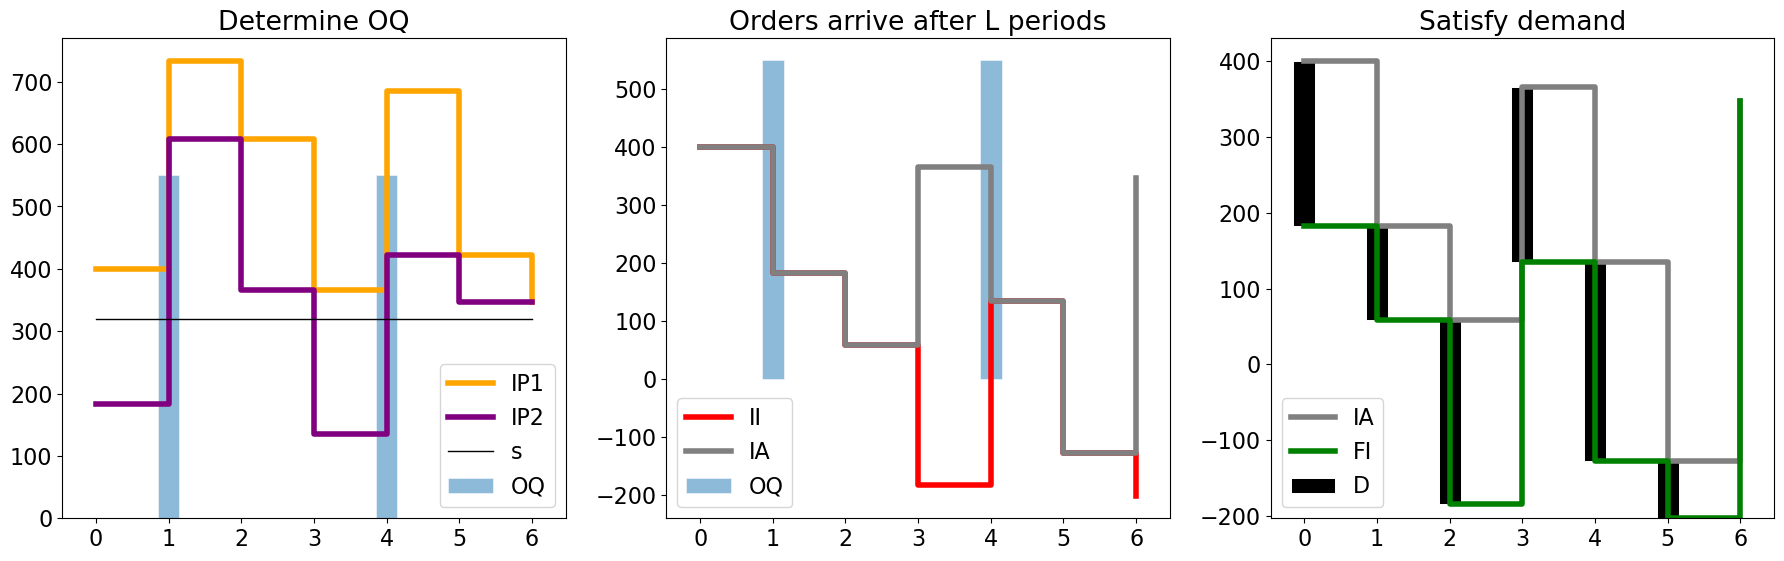

R,S


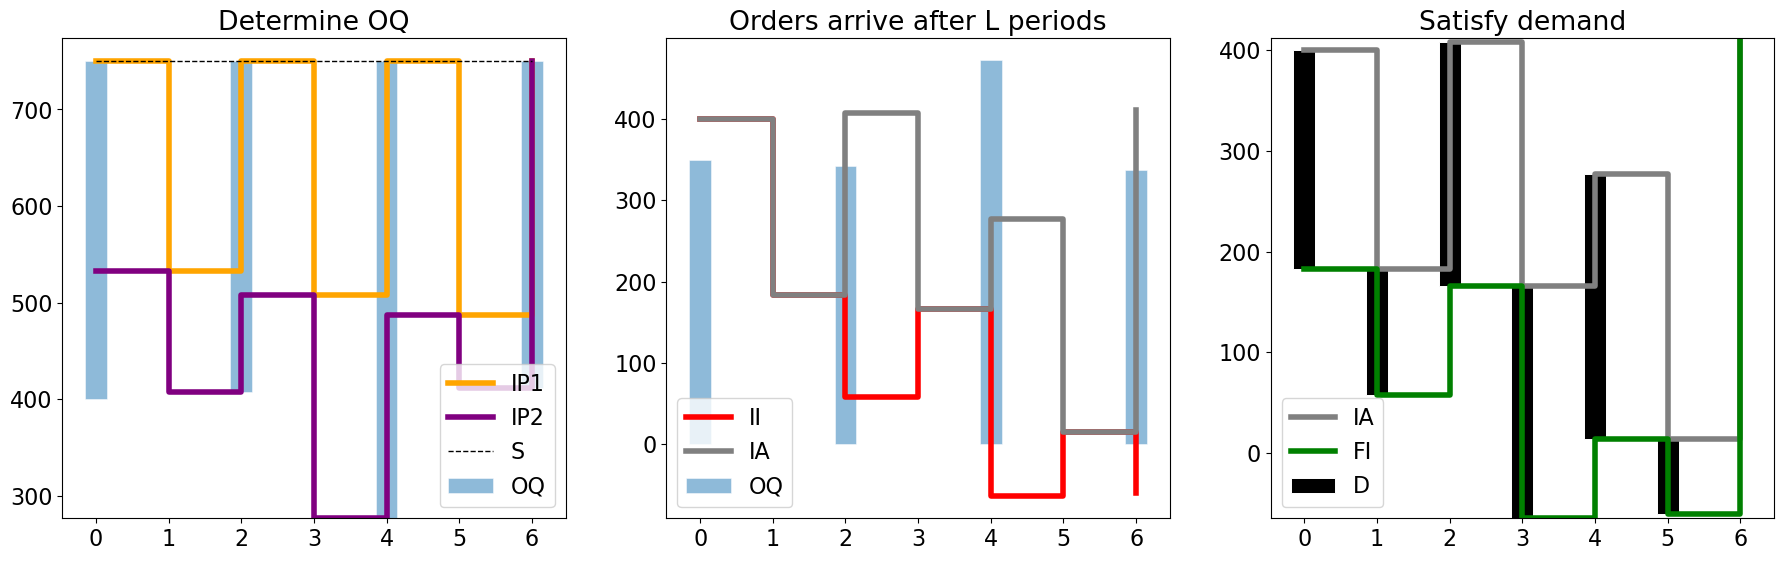

s,S


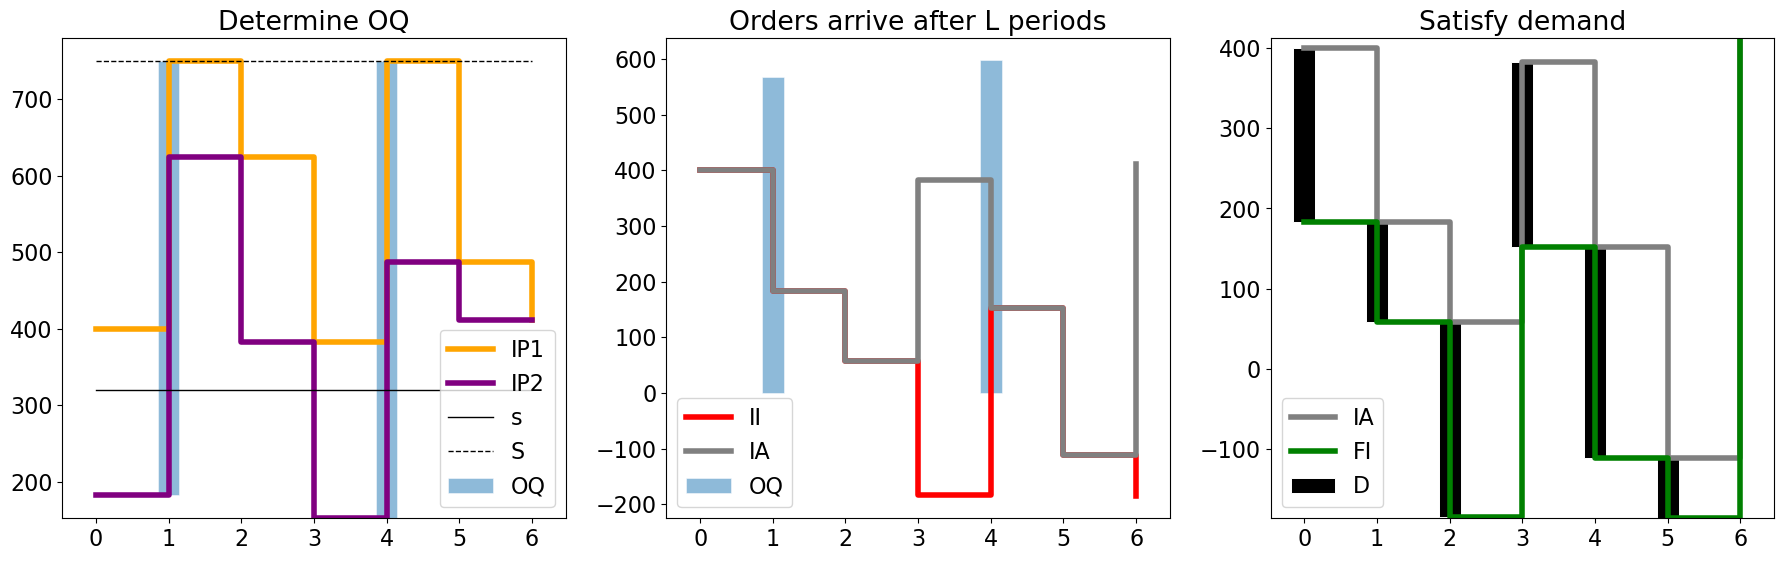

In [55]:
from matplotlib import pyplot as plt, cm

plt.rc('font', size=16)
plt.rc('lines', linewidth=4)
barwidth = 0.3
for policy in policies.keys():
    print(policy)
    
    res = policies[policy]   
    OQ = res.get('Order Quantity')
    IP0 = res.get('Inventory Position before Order')
    IP1 = res.get('Inventory Position after Order')
    IP2 = res.get('Inventory Position after Demand')
    II = res.get('Initial Inventory')
    IA = res.get('Inventory after Delivery')
    FI = res.get('Final Inventory')
    
    fig, axs = plt.subplots(nrows=1, ncols=3)
    
    ax_OQ = axs[0]
    ax_IA = axs[1]
    ax_D = axs[2]

    ax_OQ.step(range(numPeriods), IP1, where='post', label='IP1', color='orange')
    ax_OQ.step(range(numPeriods), IP2, where='post', label='IP2', color='purple')
    if policy == "s,Q":
        ax_OQ.plot(range(numPeriods), [s for t in range(numPeriods)], label='s', color='black', linewidth=1)
        ax_OQ.bar(range(numPeriods), OQ, width=barwidth, label='OQ', edgecolor="white", linewidth=0.7, bottom=0, alpha=0.5)
    elif policy == "s,S":
        ax_OQ.plot(range(numPeriods), [s for t in range(numPeriods)], label='s', color='black', linewidth=1)
        ax_OQ.plot(range(numPeriods), [S for t in range(numPeriods)], label='S', color='black', linewidth=1, linestyle='dashed')
        ax_OQ.bar(range(numPeriods), OQ, width=barwidth, label='OQ', edgecolor="white", linewidth=0.7, bottom=IP0, alpha=0.5)
    elif policy == "R,S":
        ax_OQ.plot(range(numPeriods), [S for t in range(numPeriods)], label='S', color='black', linewidth=1, linestyle='dashed')
        ax_OQ.bar(range(numPeriods), OQ, width=barwidth, label='OQ', edgecolor="white", linewidth=0.7, bottom=IP0, alpha=0.5)
    ax_OQ.legend(loc=4)
    ax_OQ.set_title('Determine OQ')

    ax_IA.step(range(numPeriods), II, where='post', label='II', color='red')
    ax_IA.step(range(numPeriods), IA, where='post', label='IA', color='grey')
    ax_IA.bar(range(numPeriods), OQ, width=barwidth, label='OQ', edgecolor="white", linewidth=0.7, bottom=0, alpha=0.5)
    ax_IA.set_title('Orders arrive after L periods')
    ax_IA.legend(loc=3)

    ax_D.step(range(numPeriods), IA, where='post', label='IA', color='grey')
    ax_D.step(range(numPeriods), FI, where='post', label='FI', color='green')
    ax_D.bar(range(numPeriods), demand, width=barwidth, label='D', edgecolor="white", linewidth=0.7, bottom=FI, color='black')
    ax_D.set_title('Satisfy demand')
    ax_D.legend(loc=3)

    plt.subplots_adjust(bottom=2, right=2.8, top=3)
    plt.show()
    